In [2]:
from common import *
from matrix import *
%matplotlib notebook
canvas(9, 6)

# Matrix Factorization

In [174]:
ifilt = ~stock_nvdf(dh, 246).makeil_like(dh)

In [175]:
def_matrices(globals(), dh[ifilt])

In [180]:
_zero = -15.
Wlog = np.log(W)
Wloga = Wlog.fillna(-15.)
Wlogazm = Wloga - Wloga.mean()
Wlogstd = np.log(W).pipe(lambda X: (X - X.mean()) / X.var() ** .5)
Wlogstda = Wlogstd.fillna(_zero)
Wlogmstd = np.log(W).pipe(lambda X: (X - X.median()) / X.var() ** .5)
Wlogmstda = Wlogmstd.fillna(_zero)
Wlogmscl = np.log(W).pipe(lambda X: (X - X.median()) / ((X - X.median()) ** 2).mean() ** .5)
Wlogmscla = Wlogmscl.fillna(_zero)
#Waqtl = W.fillna(0).qtl()
#Wanrm = Wapct.pipe(norm.ppf) + Wapct * 0
Wsqrtstd = (W ** .5).pipe(lambda X: (X - X.mean()) / X.var() ** .5)
Wsqrtstda = Wsqrtstd.fillna(_zero)
Wsqrtmstd = (W ** .5).pipe(lambda X: (X - X.median()) / X.var() ** .5)
Wsqrtmstda = Wsqrtmstd.fillna(_zero)
Wsqrtmscl = (W ** .5).pipe(lambda X: (X - X.median()) / ((X - X.median()) ** 2).mean() ** .5)
Wsqrtmscla = Wsqrtmscl.fillna(_zero)

In [ ]:
# Transforms

In [53]:
transnorm = QT(output_distribution='normal')
Ycnorm = Y * 0 + transnorm.fit_transform(Y)
Ycrnorm = (Ycnorm.T * 0 + transnorm.fit_transform(Ycnorm.T)).T
Yrnorm = (Y.T * 0 + transnorm.fit_transform(Y.T)).T
Yrcnorm = Yrnorm.T * 0 + transnorm.fit_transform(Yrnorm.T)

In [ ]:
# vanilla PCA

In [ ]:
#LIST
# Wlogmscla.T, W

In [208]:
theY, theW = Wlogstda.T[market == 4], W
theY = theY - theY.mean()
f = PCA(theY.shape[1])
Yf = f.fit_transform(theY)#, weights=theW)

In [183]:
Yf = np.load(top_dir + 'data/analysis/pca/[~246]Wlogmscla.npy')

In [184]:
#fig, (ax0, ax1) = plt.subplots(1, 2)
#ax0.plot(f.explained_variance_ratio_[:10]), ax1.plot(f.explained_variance_ratio_[:]);

<IPython.core.display.Javascript object>


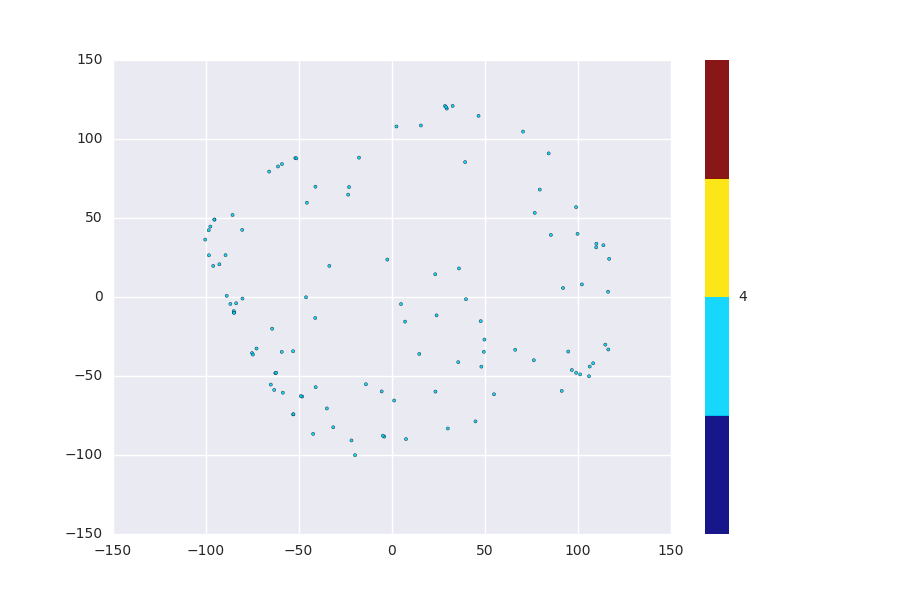

In [209]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(Yf[:, 0], Yf[:, 1], s=5, alpha=.9, c=market[market==4], cmap=plt.get_cmap('jet', 4));
plt.colorbar(ticks=[1, 2, 3, 4]);

In [190]:
np.arctan2(-7.27-4.12, 116.84-5.55)

-0.10199011342331563

In [3]:
Yf = np.load(top_dir + 'data/analysis/pca/[~246]Wlogmscla.npy')
x, y = Yf[:, 0], Yf[:, 1]
y1 = y - 4.0#4.12
x1 = x - 5.55
x2, y2 = x1 * np.cos(.102) - y1 * np.sin(.102), y1 * np.cos(.102) + x1 * np.sin(.102)
a, b = np.arctan2(y2, x2), np.arctan2(y2, -x2)
pcageo = pd.DataFrame({'$[~246].__major': x2, '$[~246].__minor': y2, '$[~246].__angle': a, '$[~246].__ccngl': b},
                      index=stockmarket[~stock_nvdf(dh, 246)].index)

In [4]:
Yf = np.load(top_dir + 'data/analysis/pca/[246]Wloga.npy')
pcaa = pd.DataFrame(Yf[:, :5], columns=['$[246].W.log.a(-15).pca({})'.format(i) for i in range(5)],
                   index=stockmarket[stock_nvdf(dh, 246)].index)

In [5]:
Yf = np.load(top_dir + 'data/analysis/pca/[246]Wlogazm.npy')
pcazm = pd.DataFrame(Yf[:, :5], columns=['$[246].W.log.a(-15).zm.pca({})'.format(i) for i in range(5)],
                   index=stockmarket[stock_nvdf(dh, 246)].index)

In [6]:
Yf = np.load(top_dir + 'data/analysis/pca/[246]Wlogmscla.npy')
pcamscl = pd.DataFrame(Yf[:, :5], columns=['$[246].W.log.mscl.a(-15).pca({})'.format(i) for i in range(5)],
                   index=stockmarket[stock_nvdf(dh, 246)].index)

In [7]:
pca = pd.concat([mat.makeil_like(dh) for mat in [pcageo, pcaa, pcazm, pcamscl]], axis=1).astype(np.float32)

In [9]:
pca.to_hdf(top_dir + 'data/features/il32/pca', mode='w', key='a')

In [171]:
np.save(top_dir + 'data/analysis/pca/[246]Wloga.npy', Yf)

In [ ]:
# "just PCA"

In [259]:
theY, theW = Ynnorm.T, W
theY = theY - theY.mean()
f = MBSparsePCA(2, verbose=3, alpha=3, n_iter=1000)
Yf = f.fit_transform(theY)#, weights=theW)

Iteration   0 (elapsed time:   0s,  0.0mn)
Iteration  34 (elapsed time:   0s,  0.0mn)
Iteration  68 (elapsed time:   0s,  0.0mn)
Iteration  102 (elapsed time:   0s,  0.0mn)
Iteration  136 (elapsed time:   0s,  0.0mn)
Iteration  170 (elapsed time:   0s,  0.0mn)
Iteration  204 (elapsed time:   0s,  0.0mn)
Iteration  238 (elapsed time:   0s,  0.0mn)
Iteration  272 (elapsed time:   0s,  0.0mn)
Iteration  306 (elapsed time:   0s,  0.0mn)
Iteration  340 (elapsed time:   0s,  0.0mn)
Iteration  374 (elapsed time:   0s,  0.0mn)
Iteration  408 (elapsed time:   0s,  0.0mn)
Iteration  442 (elapsed time:   0s,  0.0mn)
Iteration  476 (elapsed time:   0s,  0.0mn)
Iteration  510 (elapsed time:   0s,  0.0mn)
Iteration  544 (elapsed time:   0s,  0.0mn)
Iteration  578 (elapsed time:   0s,  0.0mn)
Iteration  612 (elapsed time:   0s,  0.0mn)
Iteration  646 (elapsed time:   0s,  0.0mn)
Iteration  680 (elapsed time:   0s,  0.0mn)
Iteration  714 (elapsed time:   0s,  0.0mn)
Iteration  748 (elapsed time:   0s,

In [ ]:
%matplotlib inline
canvas(16, 6)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.plot(f.lambdas_[:10]), ax1.plot(f.lambdas_[:]);

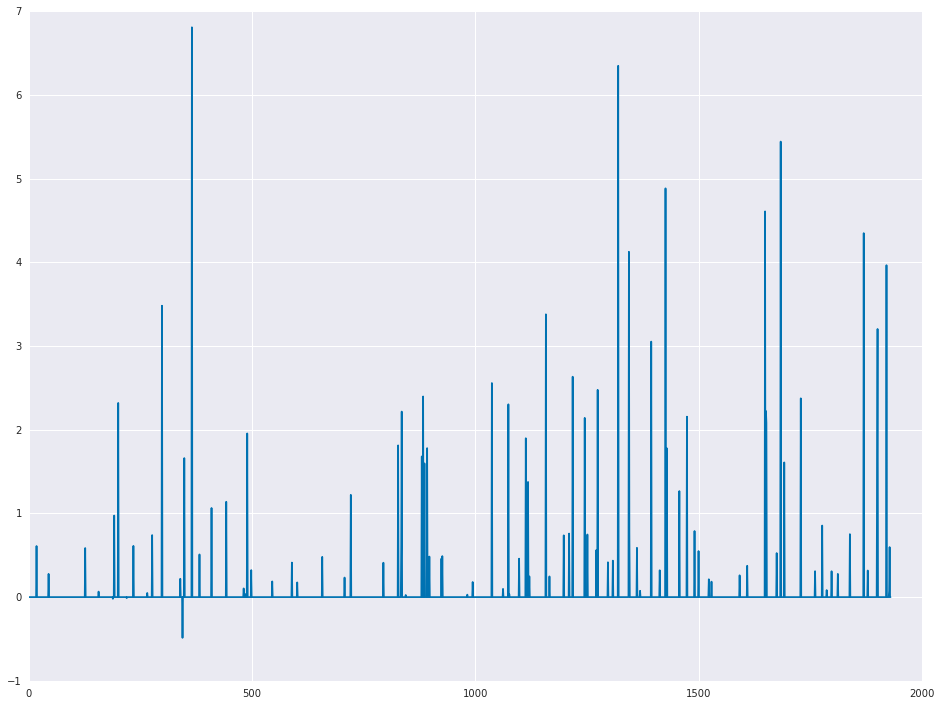

In [112]:
/plt.plot f.components_[0]

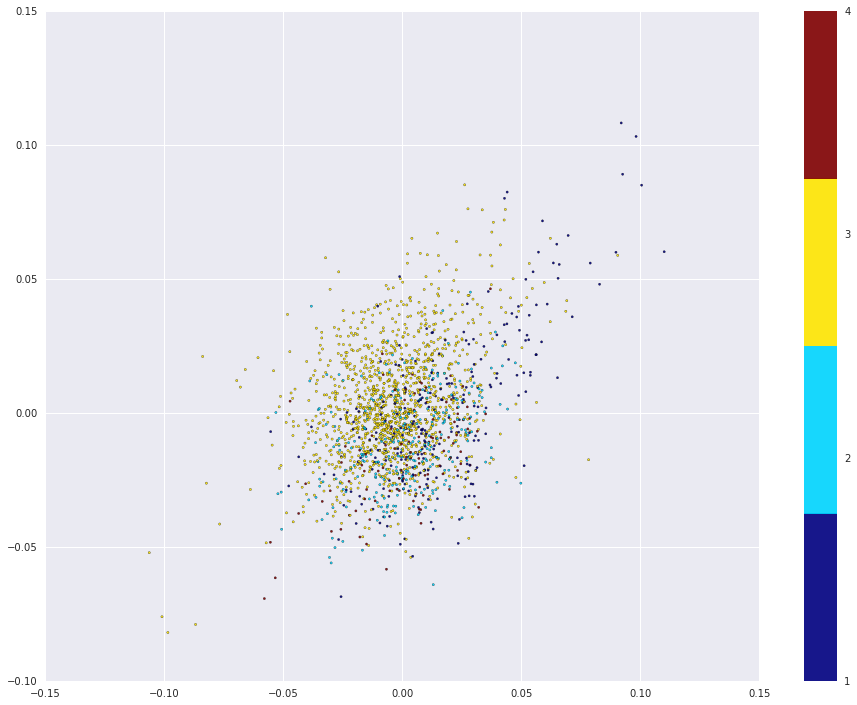

In [260]:
%matplotlib inline
canvas(16, 12)
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = Axes3D(fig)
plt.scatter(Yf[:, 0], Yf[:, 1], s=5, alpha=.9, c=market, cmap=plt.get_cmap('jet', 4));
plt.colorbar(ticks=[1, 2, 3, 4]);

In [ ]:
# Factor Analysis

In [16]:
theY = Ynnorm
noise = [None]
for i in range(1, 70):
    print(i) if i % 10 == 0 else None
    theY = theY - theY.mean()
    f = FA(i)
    f = f.fit(theY)
    noise.append(f.noise_variance_.mean())

10
20
30
40
50
60


<IPython.core.display.Javascript object>


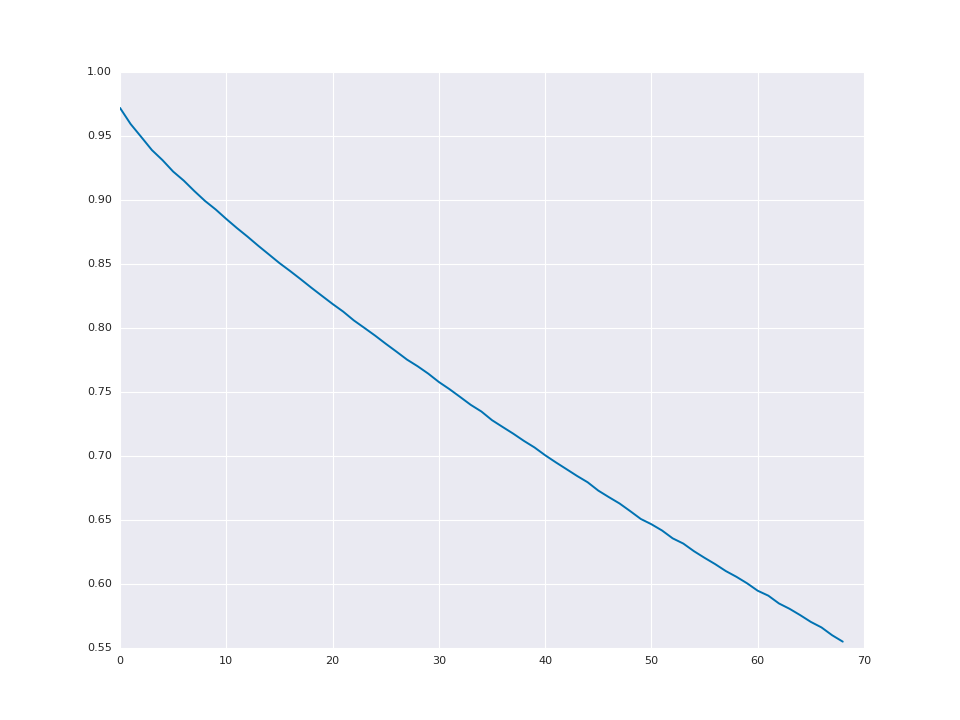

In [20]:
plt.plot(noise[1:]);

In [ ]:
# PCA outliers when I didn't remove stocks with not enough valid dates

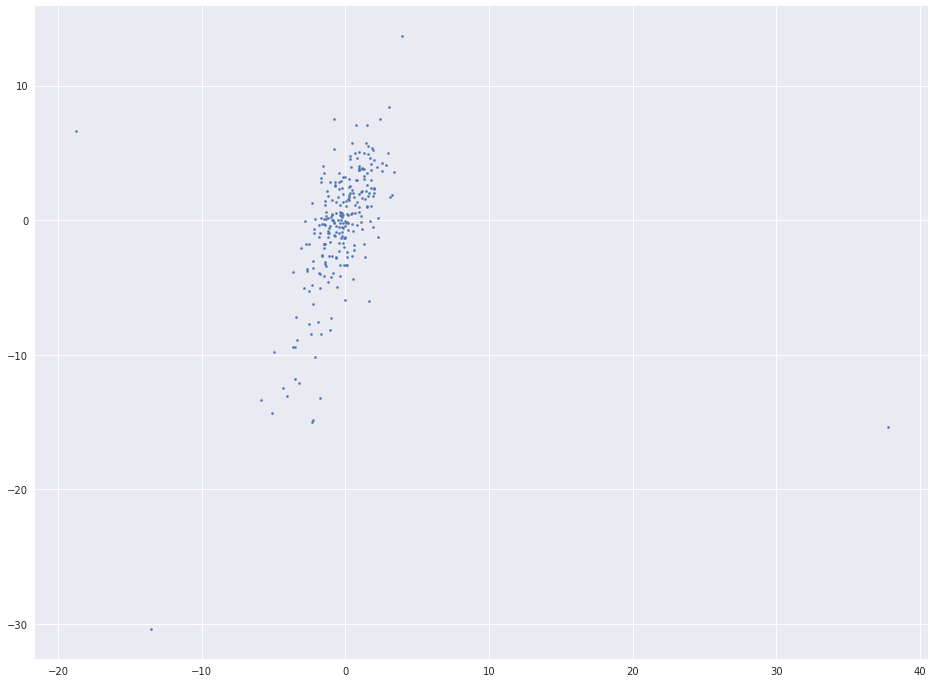

In [201]:
h = plt.scatter(Yf[:, 0], Yf[:, 1], s=5)

In [213]:
(
    (Yf[:, 0] > 30).nonzero() +
    (Yf[:, 0] < -15).nonzero() +
    (Yf[:, 1] < -30).nonzero() +
    (Yf[:, 1] > 10).nonzero() +
())

(array([257]), array([256]), array([253]), array([127]))

In [ ]:
# How to do ZCA using sklearn's PCA
# c.f. Michael Eickenberg on Google https://groups.google.com/forum/#!topic/theano-users/_63ggUdWeEI
pca = PCA(whiten=True)
transformed = pca.fit_transform(data)
pca.whiten = False
zca = pca.inverse_transform(transformed)